In [65]:
# 데이터 
A_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
A_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

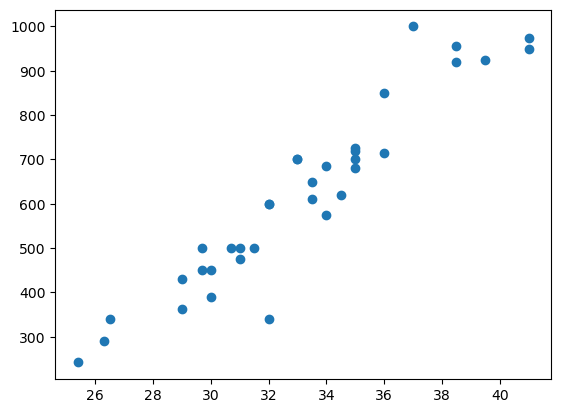

In [66]:
import matplotlib.pyplot as plt

plt.scatter(A_length,A_weight)
plt.show()

In [67]:
B_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
B_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

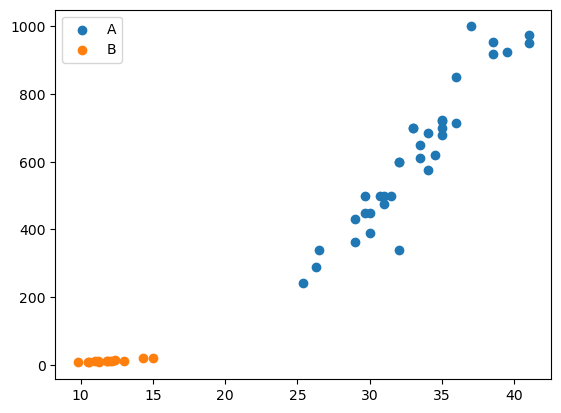

In [68]:
plt.scatter(A_length,A_weight, label = 'A')
plt.scatter(B_length,B_weight, label = 'B')
plt.legend()
plt.show()

In [69]:
length = A_length + B_length
weight = A_weight + B_weight
X = [[a,b] for a,b in zip(length,weight)]
y = [1] * len(A_length) + [0] * len(B_length)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier()
knn.fit(X,y)
knn.score(X,y)

1.0

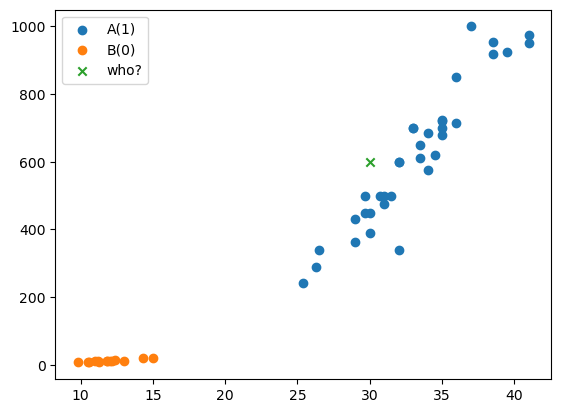

In [72]:
# (30,600) 일때 이것은 어느 그룹인가?

plt.scatter(A_length,A_weight, label = 'A(1)')
plt.scatter(B_length,B_weight, label = 'B(0)')
plt.scatter(30,600,label = "who?", marker='x')
plt.legend()
plt.show()

In [73]:
knn.predict([[30,600]])

array([1])

### 이웃의 개수를 전체 데이터로 봤을 때

In [74]:
knn = KNeighborsClassifier(n_neighbors=len(X))  # 디폴트는 주변 5개이지만 이렇게 옵션을 주면 개수가 더 많은 y의 값이 나오게 된다. b에 더 가까워도 a의 값을 추출
knn.fit(X,y)                                    # knn은 거리기반이기 때문에 이웃의 개수가 중요
knn.score(X,y)

0.7142857142857143

In [75]:
len(A_length) / len(X)

0.7142857142857143

In [76]:
len(y)

49

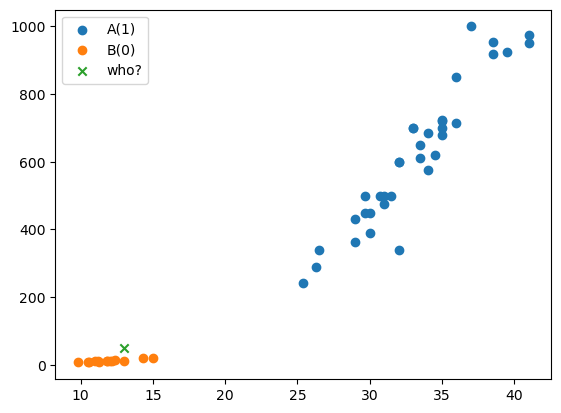

In [77]:
# (30,600) 일때 이것은 어느 그룹인가?

plt.scatter(A_length,A_weight, label = 'A(1)')
plt.scatter(B_length,B_weight, label = 'B(0)')
plt.scatter(13,50,label = "who?", marker='x')
plt.legend()
plt.show()

In [78]:
knn.predict([[13,50]])

array([1])

In [79]:
# 분할 7:3

split_num = int(len(X)* 0.7)
X_train, y_train = X[:split_num], y[:split_num]
X_test, y_test = X[split_num:], y[split_num:]

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.06666666666666667

In [81]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([1]), array([34]))

In [82]:
# 분할 8:2

split_num = int(len(X)* 0.8)
X_train, y_train = X[:split_num], y[:split_num]
X_test, y_test = X[split_num:], y[split_num:]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1]), array([ 4, 35]))

테스트 데이터를 랜덤으로 섞는 것이 중요!!

In [85]:
# 데이터 섞기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42, stratify= y)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [86]:
knn.score(X_train,y_train),knn.score(X_test,y_test)

(1.0, 1.0)

In [ ]:
# (30,600) 일때 이것은 어느 그룹인가?

plt.scatter(A_length,A_weight, label = 'A(1)')
plt.scatter(B_length,B_weight, label = 'B(0)')
plt.scatter(25,150,label = "who?", marker='x')
plt.legend()
plt.show()

In [87]:
predict_point = knn.kneighbors([[25,150]])

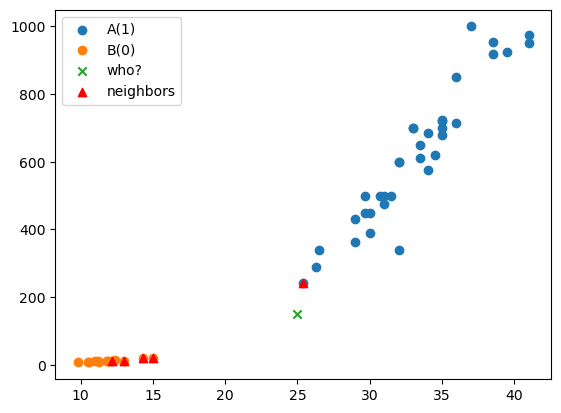

In [89]:
distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(25,150,label = 'who?',marker = 'x')
plt.scatter(np.array(X_train)[indexs,0],np.array(X_train)[indexs,1],
            label = 'neighbors',marker = '^',color='red')
plt.legend()
plt.show()

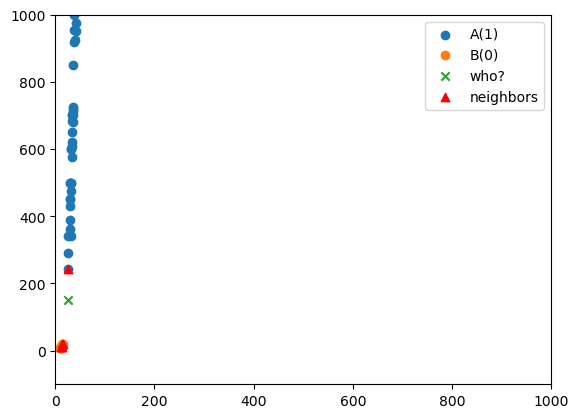

In [103]:
distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(A_length,A_weight,label='A(1)')
plt.scatter(B_length, B_weight, label='B(0)')
plt.scatter(25,150,label = 'who?',marker = 'x')
plt.scatter(np.array(X_train)[indexs,0],np.array(X_train)[indexs,1],
            label = 'neighbors',marker = '^',color='red')
plt.xlim(0,1000)
plt.ylim(-100,1000)
plt.legend()
plt.show()

스케일이 필요한 이유

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
convert_array_a = np.array(list(zip(A_length,A_weight)))
convert_array_b = np.array(list(zip(B_length,B_weight)))
scaled_a= scaler.fit_transform(convert_array_a)
scaled_b = scaler.transform(convert_array_b)

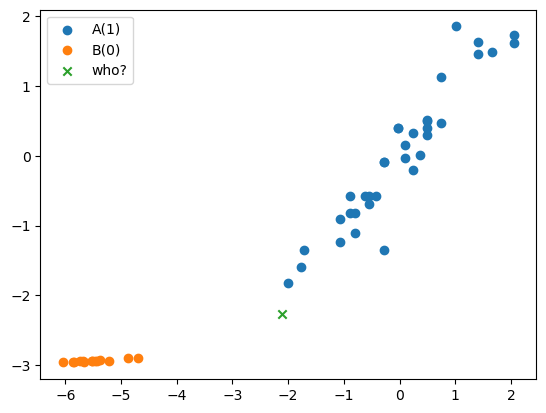

In [112]:
distances, indexs = knn.kneighbors([[25,150]])
plt.scatter(scaled_a[:,0],scaled_a[:,1],label='A(1)')
plt.scatter(scaled_b[:,0],scaled_b[:,1], label='B(0)')
who_point = scaler.transform([[25,150]])
plt.scatter(who_point[:,0],who_point[:,1],label = 'who?', marker= 'x')
plt.legend()
plt.show()

In [113]:
# 데이터 섞기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42, stratify= y)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.predict([[25,150]])


array([1])

In [115]:
predicted_points = scaler.transform([[25,150]])
predicted_points[:,0][0]

np.float64(-0.23012626562373972)

In [116]:
_, indexs = knn.kneighbors(predicted_points)

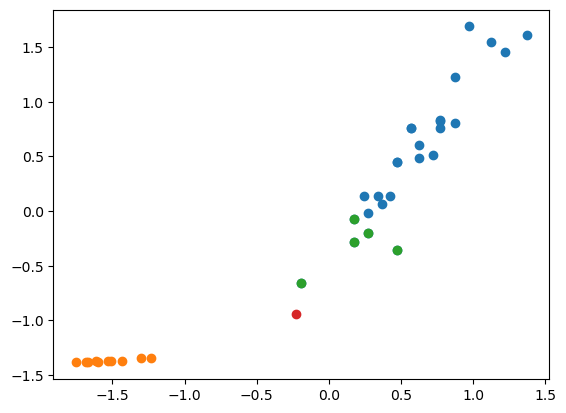

In [117]:
plt.scatter(X_train_scaled[np.array(y_train) == 1,0], 
            X_train_scaled[np.array(y_train)==1,1] )

plt.scatter(X_train_scaled[np.array(y_train) == 0,0], 
            X_train_scaled[np.array(y_train)==0,1]                                                                                                                                                                                                      alpha=                  z)
plt.scatter(X_train_scaled[indexs,0],X_train_scaled[indexs,1])
plt.scatter(predicted_points[:,0],predicted_points[:,1])

In [ ]:
# 데이터 
A_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
A_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
B_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
B_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [119]:
X = np.array(list(zip(A_length + B_length, A_length + A_weight)))
y = np.array([1] * len(A_length) + [0] * len(B_length))
X.shape , y.shape

((49, 2), (49,))

In [ ]:
# 데이터를 잘 섞어서 분할
# 스케일링
# 학습
# [25,150] 을 predict 하면 1이 출력되는지 확인

In [134]:
# 데이터를 잘 섞어서 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42, stratify=y)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

# [25,150] 을 predict 하면 1이 출력되는지 확인
new_data_scaled = scaler.transform([[25,150]])
knn.predict(new_data_scaled)


array([1])

In [175]:
# 파이프라인
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scale',StandardScaler()), 
    ('cls',KNeighborsClassifier()), 
])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42, stratify=y)
pipe.fit(x_train,y_train)
pipe.predict([[25,150]])

array([1])

In [176]:
# 딥러닝 / 클래스형태(nn.Module), nn.Sequential 조립
import torch
import torch.nn as nn

In [185]:
model = nn.Sequential(
    nn.Linear(2,8),  # (2,8) 2는 y의 특성 개수, 2개의 특성을 입력받아 8개의 특성으로 변환하여 출력한다는 뜻
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,2),    # output
)
# 입력데이터를 텐서로 변경
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)
X_train, X_test, y_train, y_test = train_test_split(X_tensor,y_tensor, test_size=0.2, random_state= 42, stratify=y)


In [186]:

import torch
import torch.optim as optim

model = nn.Sequential(
    nn.Linear( 2, 8 ),
    nn.ReLU(),
    nn.Linear( 8, 4 ),
    nn.ReLU(),
    nn.Linear( 4, 2 )  # output        
)

# 하이퍼 파라메터
device =  "cuda" if torch.cuda.is_available() else 'cpu'
lr = 1e-03
epochs = 20
model.to(device)


# 손실함수 / 옵티마이져
criterian = nn.CrossEntropyLoss()  # softmax + log 
optim = optim.Adam(model.parameters() , lr=lr)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype = torch.long)

# batch = full dataset
for epoch in range(epochs):
    optim.zero_grad()    
    X_train, y_train = X_train.to(device), y_train.to(device)
    preds = model(X_train)    
    loss = criterian(preds,y_train)
    loss.backward()
    optim.step()


    # # if (epoch+1) % 
    # # 정확도 계산
    yhat = torch.argmax(preds,dim=1)
    acc = (yhat == y_train).float().mean()
    print(f'epoch : {epoch+1}  acc: {acc.item()}')

epoch : 1  acc: 0.28205129504203796
epoch : 2  acc: 0.28205129504203796
epoch : 3  acc: 0.28205129504203796
epoch : 4  acc: 0.28205129504203796
epoch : 5  acc: 0.28205129504203796
epoch : 6  acc: 0.28205129504203796
epoch : 7  acc: 0.28205129504203796
epoch : 8  acc: 0.28205129504203796
epoch : 9  acc: 0.28205129504203796
epoch : 10  acc: 0.28205129504203796
epoch : 11  acc: 0.28205129504203796
epoch : 12  acc: 0.28205129504203796
epoch : 13  acc: 0.28205129504203796
epoch : 14  acc: 0.28205129504203796
epoch : 15  acc: 0.28205129504203796
epoch : 16  acc: 0.28205129504203796
epoch : 17  acc: 0.28205129504203796
epoch : 18  acc: 0.28205129504203796
epoch : 19  acc: 0.28205129504203796
epoch : 20  acc: 0.28205129504203796


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_9416\3223383625.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_9416\3223383625.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.long)
